In [284]:
#Steven Zajac-Descôteaux & Maya Rossi 

In [285]:
# The dataset is from: https://www.inspq.qc.ca/covid-19/donnees

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from rdd import rdd
from datetime import datetime

In [346]:
#Code to format CSV file from online
queb = pd.read_csv('Data/Confirmed_Cases_week.csv')
cov = queb.copy()
cov['Cas'] = cov.sum(axis=1)
cov['Day'] = cov.index
cov = cov.rename(columns={'Date de déclaration du cas':'Date'})
cov.Date = pd.to_datetime(cov.Date)

In [347]:
#cov['Day_sq'] = cov['Day'].apply(np.square)
cov['Date'] = pd.to_datetime(cov['Date'])
LOCKDOWN_1 = pd.to_datetime('2020-3-20')        
SCHOOL_OPEN = pd.to_datetime('2020-8-31')
LOCKDOWN_2 = pd.to_datetime('2020-12-25')

In [348]:
#Period before & after first lockdown
period1_df = cov[(cov['Date'] > '2020-2-21') & (cov['Date'] <= '2020-5-1')]
period1_df['Day_sq'] = period1_df['Day'].apply(np.square) #Square days

pre_LD1 = period1_df[period1_df['Date']<=LOCKDOWN_1] #Before
post_LD1 = period1_df[period1_df['Date']>LOCKDOWN_1] #After


#Period before & after return to school
period2_df = cov[(cov['Date'] > '2020-8-3') & (cov['Date'] <= '2020-10-11')]
period2_df.reset_index(inplace=True,drop=True) #Reset index for graphs to start at 0 and not day 163
period2_df['Day'] = (period2_df['Day'] - 162)
period2_df['Day_sq'] = period2_df['Day'].apply(np.square)

pre_sch = period2_df[period2_df['Date']<=SCHOOL_OPEN] 
post_sch = period2_df[period2_df['Date']>SCHOOL_OPEN]


#Period before and after Xmas lockdown
period3_df = cov[(cov['Date'] > '2020-11-27') & (cov['Date'] <= '2021-1-22')]
period3_df.reset_index(inplace=True,drop=True)
period3_df['Day'] = (period3_df['Day'] - 278)
period3_df['Day_sq'] = period3_df['Day'].apply(np.square)

pre_xmas = period3_df[period3_df['Date']<=LOCKDOWN_2]
post_xmas = period3_df[period3_df['Date']>LOCKDOWN_2]

<ipython-input-348-eef2739bd242>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period1_df['Day_sq'] = period1_df['Day'].apply(np.square) #Square days
<ipython-input-348-eef2739bd242>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period2_df['Day'] = (period2_df['Day'] - 162)
<ipython-input-348-eef2739bd242>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [349]:
#Pre-locdown

X = pre_LD1[['Day','Day_sq']]
X = sm.add_constant(X)

y = pre_LD1['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)


model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     8.573
Date:                Mon, 25 Jan 2021   Prob (F-statistic):            0.00165
Time:                        21:43:48   Log-Likelihood:                -106.21
No. Observations:                  26   AIC:                             218.4
Df Residuals:                      23   BIC:                             222.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7888      8.077      1.831      0.067      -1.042      30.619
Day           -5.4915      2.114     -2.597      0.009      -9.636      -1.347
Day_sq         0.3213      0.102      3.148      0.002       0.121       0.521
==============================================================================
Omnibus:                       17.835   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.721
Skew:                           1.380   Prob(JB):                     1.58e-06
Kurtosis:                       7.129   Cond. No.                         812.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [350]:
#Post-Lockdown

X = post_LD1[['Day','Day_sq']]
X = sm.add_constant(X)

y = post_LD1['Cas']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     111.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           7.79e-17
Time:                        21:43:48   Log-Likelihood:                -258.99
No. Observations:                  42   AIC:                             524.0
Df Residuals:                      39   BIC:                             529.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1327.5459    268.805     -4.939      0.000   -1854.394    -800.697
Day           77.6596     13.104      5.926      0.000      51.976     103.343
Day_sq        -0.6739      0.148     -4.561      0.000      -0.964      -0.384
==============================================================================
Omnibus:                        0.207   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.902   Jarque-Bera (JB):                0.207
Skew:                          -0.144   Prob(JB):                        0.902
Kurtosis:                       2.814   Cond. No.                     4.08e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 4.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

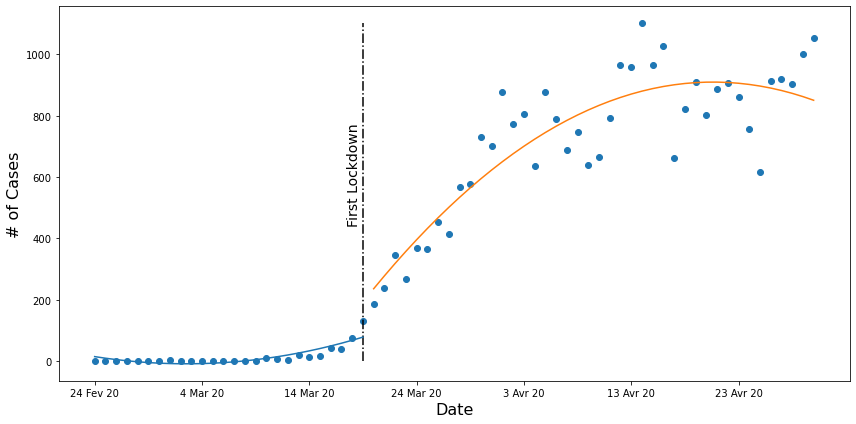

In [351]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=period1_df.Day,y=period1_df.Cas,)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=450,x=23.5,s='First Lockdown',rotation=90,fontsize=14)
ax.vlines(x=25,ymin=period1_df.Cas.min(),ymax=period1_df.Cas.max(),linestyle='dashdot')
plt.xticks(np.linspace(0,60,7),('24 Fev 20','4 Mar 20','14 Mar 20','24 Mar 20','3 Avr 20','13 Avr 20',
                                '23 Avr 20'))

plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

In [352]:
##################################################

In [353]:
#Pre-School Opening

X = pre_sch[['Day','Day_sq']]
X = sm.add_constant(X)

y = pre_sch['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     20.86
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.69e-06
Time:                        21:43:49   Log-Likelihood:                -120.81
No. Observations:                  28   AIC:                             247.6
Df Residuals:                      25   BIC:                             251.6
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        139.9803      8.556     16.361      0.000     123.211     156.750
Day           -9.7332      1.637     -5.944      0.000     -12.943      -6.524
Day_sq         0.3610      0.057      6.373      0.000       0.250       0.472
==============================================================================
Omnibus:                        1.690   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.088
Skew:                          -0.483   Prob(JB):                        0.580
Kurtosis:                       2.985   Cond. No.                         948.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [354]:
#Post-School Opening

X = post_sch['Day']
X = sm.add_constant(X)

y = post_sch['Cas']

model_2 = sm.OLS(y,X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     359.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.83e-21
Time:                        21:43:49   Log-Likelihood:                -249.92
No. Observations:                  41   AIC:                             503.8
Df Residuals:                      39   BIC:                             507.3
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -745.4258     66.803    -11.159      0.000    -876.358    -614.494
Day           28.2279      1.490     18.948      0.000      25.308      31.148
==============================================================================
Omnibus:                        0.480   Durbin-Watson:                   0.658
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.611
Skew:                           0.209   Prob(JB):                        0.737
Kurtosis:                       2.572   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

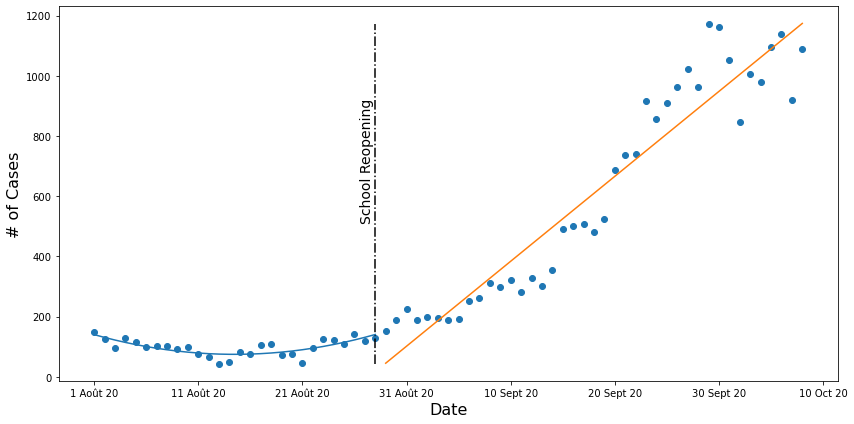

In [355]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=period2_df.Day,y=period2_df.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=520,x=25.5,s='School Reopening',rotation=90,fontsize=14)
ax.vlines(x=27,ymin=period2_df.Cas.min(),ymax=period2_df.Cas.max(),linestyle='dashdot')
plt.xticks(np.linspace(0,70,8),('1 Août 20','11 Août 20','21 Août 20','31 Août 20',
                                   '10 Sept 20','20 Sept 20','30 Sept 20','10 Oct 20'))
plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

In [356]:
########################

In [357]:
#Pre-Xmas Lockdown

X = pre_xmas['Day']
X = sm.add_constant(X)

y = pre_xmas['Cas']

model_1 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_1 = model_1.predict(X)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     228.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.15e-14
Time:                        21:43:50   Log-Likelihood:                -171.30
No. Observations:                  28   AIC:                             346.6
Df Residuals:                      26   BIC:                             349.3
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1368.4877     35.386     38.673      0.000    1299.132    1437.844
Day           35.5750      2.354     15.115      0.000      30.962      40.188
==============================================================================
Omnibus:                        1.716   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.018
Skew:                           0.466   Prob(JB):                        0.601
Kurtosis:                       3.066   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [358]:
#Post-Xmas Lockdown

X = post_xmas[['Day','Day_sq']]
X = sm.add_constant(X)

y = post_xmas['Cas']

model_2 = sm.OLS(y, X).fit(cov_type='HC2')

y_hat_2 = model_2.predict(X)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Cas   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     47.70
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           4.35e-09
Time:                        21:43:51   Log-Likelihood:                -186.68
No. Observations:                  27   AIC:                             379.4
Df Residuals:                      24   BIC:                             383.2
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2606.9585   1608.219     -1.621      0.105   -5759.011     545.094
Day          292.1809     80.171      3.644      0.000     135.048     449.314
Day_sq        -4.1318      0.965     -4.281      0.000      -6.023      -2.240
==============================================================================
Omnibus:                        1.725   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.041
Skew:                           0.060   Prob(JB):                        0.594
Kurtosis:                       2.045   Cond. No.                     5.65e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 5.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

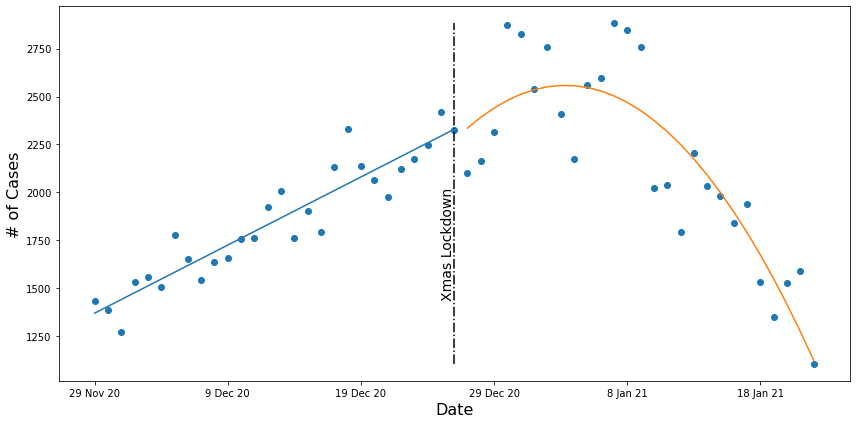

In [359]:
fig, ax = plt.subplots(figsize=(12,6))

plt.scatter(x=period3_df.Day,y=period3_df.Cas)
plt.plot(y_hat_1)
plt.plot(y_hat_2)
ax.text(y=1450,x=26,s='Xmas Lockdown',rotation=90,fontsize=14)
ax.vlines(x=27,ymin=period3_df.Cas.min(),ymax=period3_df.Cas.max(),linestyle='dashdot')
plt.xticks(np.linspace(0,50,6),('29 Nov 20','9 Dec 20','19 Dec 20',
                                   '29 Dec 20','8 Jan 21','18 Jan 21'))

plt.xlabel('Date',fontsize=16)
plt.ylabel('# of Cases',fontsize=16)
plt.tight_layout()

These graphs represent a visualization of the effect of certain events on the **number of Covid cases**
reported in Quebec.
These events are:
- the first lockdown (20-03-2020)
- schools reopening (31-08-2020)
- the second lockdown (25-12-2020)

### Design considerations of the 3 graphs:
We decided to look at data spanning around 4 weeks pre-event and 6 weeks post-event. For the first event, we have no more than 4 weeks of data available pre-lockdown (Covid was not really on the radar prior to this). We chose to look at 6 weeks worth of data post-event to give the event some time to take effect. Since we know that in this particular case (Covid), symptoms can take up to 2 weeks to manifest, we can presume that there will be no real change seen in case growth for about a week to 2 weeks after the event takes place. Therefore we decided to perform analyses on 6 weeks of data following the event in order to account for those 2 weeks. Including a bit of a longer time after the cutoff also allowed us to fully appreciate the shape of the observations and how they might change.
We decided to not go above x^2 for the terms, in order to keep the model interpretable. We specify the shape of each individual graph below.

### First Lockdown (20/03/2020)
For the first lockdown, both pre- and post-event models fit best with a polynomial design (x^2). As seen in the graph, a simple linear regression would not be a good fit for the curve of the data as time progresses.
Looking at the coefficients obtained by the models, pre-event reports a coeff of -5.49x and 0.32x^2 indicating an **increasing increase** in number of cases. The constant is almost 15, which is a little more challenging to interpret. It is also not significant at a .05 level, indicating that it is not significantly different from 0. This makes sense, because this says that at day 0 (before the start of Covid), there were no cases.
Post-event coeffs are 77.66x + -0.67x^2 indicating a **decreasing increase** in cases. For each passing day, there are 77.66x - 0.67x^2 more cases.
It is worth noting that at the start of the pandemic, tests were not widely available and people were only being tested if they showed symptoms. Therefore, while the number of cases post-lockdown shows a ceiling effect, this could be falsely represented by the fact that testing was hard to come by, and therefore we should have actually seen a much bigger increase in number of cases than what is reported here. 

### Schools reopening (31/08/2020)
Post-school opening there is an increase of about 28 cases per day vs -9.73x + 0.36x^2 new cases per day during the pre-school opening period.
This indicates an **increasing increase** in number of cases since the schools open. This could be indicative of a large number of people getting back into close quarters. It can also suggest that perhaps over the summer people were able to spend more time outside and more time social distancing in the nice weather. It could also mean that the virus does not fair as well in hot weather, and with the opening of schools coinciding with the beginning of fall, the virus managed to make a comeback as the temperature declined.

### Christmas Lockdown (25/12/2020)
Prior to the Christmas lockdown, the cases were increasing at a rate of around 35 cases per day (coeff of 35.57 for x). After lockdown was enforced, 292.18x - 4.13x^2 new cases per day. This curve is an **increasing decrease** in the number of reported cases.
Christmas lockdown also coincided with kids being out of school for Christmas break. As we saw with the school opening trend above, the schools reopening coincide with an increasing increase in reported covid cases. So while the lockdown may be working, the fact that kids were not congregating in school, like they were in the fall, could of also helped this decrease in reported cases. A few weeks after the lockdown was enforced, a curfew also came into play. This curfew is another event that could be responsible for this large decrease in reported cases seen during this time period.

### Other regression design considerations
In some instances, a squared variable might not be the best fit for this data. When the values taper off, a log manipulation might be more appropriate. Similarly, some time points might be better suited to exponenentiate variables (instead of square ones), like e^x or 10^x instead of x^2.
Maybe we could consider using Box-Cox to figure out how to manipulate the data. Box-Cox is a "process by where we find the maximum likelihood estimate of the most appropriate transformation that we should apply to our response value so that our data would be able have a constant variance." (https://towardsdatascience.com/statistical-overview-of-linear-regression-examples-in-python-80a38680e053)
So this method could help us decide how to transform the response value for the data.